In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn import mixture

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from imblearn.over_sampling import RandomOverSampler

from sklearn.neighbors import KNeighborsRegressor

import numpy
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn import linear_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import export_text

In [10]:
df = pd.read_csv('accident.csv',encoding='windows-1252')
df_1 = pd.read_csv('PBType.csv')
df_2 = pd.read_csv('VSOE.csv')
drugs = pd.read_csv('Drugs.csv')
crash = pd.read_csv('NMCrash.csv')
filenames = [df,df_1,df_2,drugs,crash]

C:\Users\bwolf\AppData\Local\Temp\ipykernel_16812\515486868.py:1: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accident.csv',encoding='windows-1252')


In [111]:
df

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR,datetime
8,1,Alabama,10009,1,1,0,0,1,1,0,...,Not Applicable (Not Transported),0,None,0,None,0,None,1,0,2019-02-08 07:53:00
16,1,Alabama,10017,2,2,0,0,2,2,0,...,52,0,None,0,None,0,None,1,0,2019-01-07 14:15:00
20,1,Alabama,10021,2,2,0,0,2,2,0,...,Not Applicable (Not Transported),0,None,0,None,0,None,1,0,2019-01-08 18:50:00
22,1,Alabama,10023,2,2,0,0,3,3,0,...,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0,2019-01-11 16:00:00
23,1,Alabama,10024,1,1,0,0,1,1,0,...,Not Applicable (Not Transported),0,None,0,None,0,None,1,0,2019-01-11 13:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33447,56,Wyoming,560081,1,1,0,0,3,3,0,...,0,0,None,0,None,0,None,1,0,2019-08-11 23:00:00
33452,56,Wyoming,560086,3,3,0,0,4,4,0,...,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0,2019-09-12 13:50:00
33459,56,Wyoming,560093,2,2,0,0,10,10,0,...,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,1,2019-09-10 20:42:00
33479,56,Wyoming,560114,2,2,0,0,4,4,0,...,Not Applicable (Not Transported),0,None,0,None,0,None,1,0,2019-10-04 15:19:00


In [31]:
merge = df.merge(df_1, on = 'ST_CASE', how = 'inner')
print(len(merge.columns))
merge = merge.merge(df_2, on = 'ST_CASE', how = 'inner')
print(len(merge.columns))
merge = merge.merge(drugs, on = 'ST_CASE', how = 'inner')
print(len(merge.columns))
merge = merge.merge(crash, on = 'ST_CASE', how = 'inner')
print(len(merge.columns))

135
143
151


C:\Users\bwolf\AppData\Local\Temp\ipykernel_16812\2020240114.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'STATE_x', 'STATENAME_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge = merge.merge(drugs, on = 'ST_CASE', how = 'inner')
C:\Users\bwolf\AppData\Local\Temp\ipykernel_16812\2020240114.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VEH_NO_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge = merge.merge(crash, on = 'ST_CASE', how = 'inner')


157


In [12]:
#merged = pd.merge(df,drugs,on='ST_CASE',how = 'inner') #.fillna(0,inplace=True)
#merged = pd.merge(merged,df_2,on='ST_CASE',how = 'left')
#merged = pd.merge(merged,crash,on='ST_CASE',how = 'left')

In [32]:
merge.fillna(0,inplace=False) #rur,hr,dr,bright/dt

,STATE_x,STATENAME_x,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,DRUGSPEC,DRUGSPECNAME,DRUGRES,DRUGRESNAME,STATE,STATENAME,VEH_NO_y,PER_NO,MTM_CRSH,MTM_CRSHNAME
0,1,Alabama,10004,1,1,0,1,1,1,1,...,1,Whole Blood,1,"Tested, No Drugs Found/Negative",1,Alabama,0,1,9,Wrong-Way Riding or Walking
1,1,Alabama,10004,1,1,0,1,1,1,1,...,1,Whole Blood,1,"Tested, No Drugs Found/Negative",1,Alabama,0,1,19,"Not Visible (Dark clothing, No Lighting, etc.)"
2,1,Alabama,10004,1,1,0,1,1,1,1,...,0,Test Not Given,0,Test Not Given,1,Alabama,0,1,9,Wrong-Way Riding or Walking
3,1,Alabama,10004,1,1,0,1,1,1,1,...,0,Test Not Given,0,Test Not Given,1,Alabama,0,1,19,"Not Visible (Dark clothing, No Lighting, etc.)"
4,1,Alabama,10004,1,1,0,1,1,1,1,...,1,Whole Blood,1,"Tested, No Drugs Found/Negative",1,Alabama,0,1,9,Wrong-Way Riding or Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137475,56,Wyoming,560107,1,1,0,1,1,1,1,...,99,Reported as Unknown if Tested,999,Reported as Unknown if Tested for Drugs,56,Wyoming,0,1,4,"In Roadway Improperly (Standing, Lying, Workin..."
137476,56,Wyoming,560107,1,1,0,1,1,1,1,...,99,Reported as Unknown if Tested,999,Reported as Unknown if Tested for Drugs,56,Wyoming,0,1,19,"Not Visible (Dark clothing, No Lighting, etc.)"
137477,56,Wyoming,560107,1,1,0,1,1,1,1,...,0,Test Not Given,0,Test Not Given,56,Wyoming,0,1,2,Failure to Yield Right-Of-Way
137478,56,Wyoming,560107,1,1,0,1,1,1,1,...,0,Test Not Given,0,Test Not Given,56,Wyoming,0,1,4,"In Roadway Improperly (Standing, Lying, Workin..."


In [112]:
print(list(merge.columns))

['STATE_x', 'STATENAME_x', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME', 'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR', 'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2', 'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV', 'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER', 'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR', 'NOT_HOURNAME', 'NOT_MIN', 'NOT_MINNAME', 'ARR_HOUR', 'ARR_HOURNAME', 'ARR_MIN', 'ARR_MINNAME', 'HOSP_HR', 'HOSP_

In [36]:
hmap = folium.Map(location=[43.8, -89], zoom_start=8, )
hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUD.values)),min_opacity=0.5,radius=17, blur=15,max_zoom=1)
hmap.add_child(hm_wide)

In [6]:
# frq_items = apriori(df['PERNOTMVIT', min_support = 0.05, use_colnames = True)
# rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
# print(rules.head())

In [37]:
from sklearn.preprocessing import StandardScaler
features = ['PERSONS', 'FATALS','VE_TOTAL'] #'HOSP_MN',
x = df.loc[:, features].values
y = df.loc[:, ['DRUNK_DR']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
principalDataframe

,PC1,PC2,PC3
0,0.506234,0.462336,0.043817
1,0.117736,0.387231,-0.370445
2,1.614309,0.963620,-0.294013
3,-0.990339,-0.114053,-0.032615
4,-0.990339,-0.114053,-0.032615
...,...,...,...
33482,-0.990339,-0.114053,-0.032615
33483,3.830458,1.966188,-0.969673
33484,-0.990339,-0.114053,-0.032615
33485,-0.601840,-0.038948,0.381646


In [38]:
targetDataframe = df[['DRUNK_DR']]
newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1)
newDataframe

,PC1,PC2,PC3,DRUNK_DR
0,0.506234,0.462336,0.043817,1
1,0.117736,0.387231,-0.370445,0
2,1.614309,0.963620,-0.294013,0
3,-0.990339,-0.114053,-0.032615,0
4,-0.990339,-0.114053,-0.032615,1
...,...,...,...,...
33482,-0.990339,-0.114053,-0.032615,0
33483,3.830458,1.966188,-0.969673,0
33484,-0.990339,-0.114053,-0.032615,1
33485,-0.601840,-0.038948,0.381646,1


Clustering type Number ONE

In [39]:
# k-means, hierarchical clustering, and density-based clustering.

In [40]:
pca.explained_variance_ratio_

array([0.59596831, 0.30060696, 0.10342473])

In [41]:
pca.explained_variance_ratio_
pca.components_

array([[ 0.67815739,  0.36166535,  0.63976614],
       [ 0.131101  , -0.91609985,  0.37891105],
       [ 0.72312867, -0.17308735, -0.66867458]])

In [12]:
# forgot s method
# features as a function of cluster number 3/4 hist per feature
#stsc in df

The variables that give the greatest explanation of varaince account for around 70% of total, with the third variable finishing the total variance in prediction. 

kmeans.labels_=[1 1 9 ... 0 6 4]
<class 'list'>


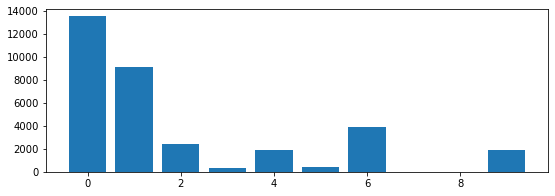

In [42]:
x = df.loc[:, features].values
y = df.loc[:, ['DRUNK_DR']].values
X = StandardScaler().fit_transform(x)
# Where did I get the n_clusters=10? Cheating! I know these are
# images of 10 digits, but normal clustering is on unlabeled data.
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
N = X.shape[0]
kmeans.fit(X)
print(f'kmeans.labels_={kmeans.labels_}') # cluster IDs, not digit labels
#print(f'kmeans.cluster_centers_={kmeans.cluster_centers_}')
r = kmeans.labels_
r = list(r)
print(type(r))
def count_unique_values(lst):
    value_counts = {}
    for value in lst:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    return value_counts
x = count_unique_values(r)
keys = list(x.keys())
values = list(x.values())

# Set the figure sized
plt.figure(figsize=(9, 3))

# Plot the bar chart
plt.bar(keys, values)

# Show the plot
plt.show()

In [45]:
df = df.dropna()
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [46]:
# X = df[['VE_TOTAL','PERSONS','HOSP_MN']].to_numpy()
# y = df[['DRUNK_DR']].to_numpy()
# class_names = ['0', '1']
# clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# clf.fit(X, y)
# plt.figure(figsize=(8, 8))                                                          
# tree.plot_tree(clf, feature_names=feature_names, class_names=class_names)
# plt.title('Drunk Driving sort')
# plt.show(block=False)
# print(f'Accuracy on training data is clf.score(X, y)={clf.score(X, y)}.')

In [47]:
# # Issue here is that it just keeps running.  What I am trying to do here is to break the data into train test split of 50
# # and then run SVM,ID3,and KNN to see which of these will classify these the best. Doesn't finish running.  Might try on databricks?  If so, should I put the csv into azure?
# df2 = df
# X = df2[['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL']].to_numpy()
# #        'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'CITY', 'DAY',
# #        'DAYNAME', 'MONTH', 'YEAR', 'DAY_WEEK',
# #        'HOUR', 'MINUTE', 'NHS', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'RUR_URB',
# #         'FUNC_SYS']].to_numpy()  #'RD_OWNER', 'MILEPT', 'LATITUDE', 'LONGITUD',
# #        'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
# #        'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1',
# #        'WEATHER2', 'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR',
# #        'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN',
# #        'CF1', 'CF2', 'FATALS']].to_numpy()
# y = df2[['DRUNK_DR']].to_numpy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# len_list = [0,1,2,3]
# KERNEL_SVM = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 100]}
# KERNEL_logi = {'C':[0.1, 1, 100], 'max_iter':[5000]}
# KERNEL_ID3 = {'max_depth':[1,3,5,7]}
# KERNEL_KNN = {'n_neighbors':[1,2,3,4]}
# kern_list = [KERNEL_SVM, KERNEL_logi, KERNEL_ID3, KERNEL_KNN]
# svm = SVC()
# #logir = linear_model.LogisticRegression()
# id3 = DecisionTreeClassifier()
# knn = KNeighborsClassifier('entropy')
# mod_list = [svm, id3, knn]
# list_of_scores = []
# best_i_class = -1
# best_score_val = -np.inf
# best_classy = None
# for i in range(len(len_list)):
#     clf = GridSearchCV(mod_list[i], kern_list[i])
#     clf.fit(X_train,y_train)
#     accuracy = clf.score(X_valid, y_valid)
#     print(f'index = {i},accuracy = {accuracy:.3}')
#     print(f'The paramaters are {kern_list[i]}')
#     if accuracy > best_score_val:
#         best_score_val = accuracy
#         best_i_class = i
#         best_classy = clf
# #     list_of_scores.append(clf.score(X_valid, y_valid))  #labels not feture set
# print(f'Accuracy = {best_score_val:3}')
# #print(f'Index of the classifier = {best_i_class}')
# print(f'best option is {mod_list[best_i_class]}')
# #print(f'Precision is = {precision_score(X_valid, y_valid)}')
# #print(f'Recall is ={recall_score(X_valid, y_valid)}') 
# print(f'clf.best_score_={best_score_val:.3}, ' + f'clf.best_params_={clf.best_params_}')

# summary statistics to compute
make just the bike fatalities relevant
Per capita ranking & laws associated with that
Group spatial data and drunkenness
drunkeness as a factor in accident

In [48]:
resultdf=df.where(df['PERNOTMVIT']==True)

In [49]:
newdf = resultdf.dropna()

kmeans.labels_=[0 0 0 ... 0 0 0]
<class 'list'>


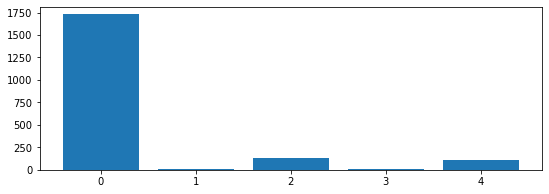

In [50]:
x = newdf.loc[:, features].values
y = newdf.loc[:, ['DRUNK_DR']].values
X = StandardScaler().fit_transform(x)
# Where did I get the n_clusters=10? Cheating! I know these are
# images of 10 digits, but normal clustering is on unlabeled data.
kmeans = KMeans(n_clusters=5, n_init=5, random_state=0)
N = X.shape[0]
kmeans.fit(X)
print(f'kmeans.labels_={kmeans.labels_}') # cluster IDs, not digit labels
#print(f'kmeans.cluster_centers_={kmeans.cluster_centers_}')
r = kmeans.labels_
r = list(r)
print(type(r))
def count_unique_values(lst):
    value_counts = {}
    for value in lst:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    return value_counts
x = count_unique_values(r)
keys = list(x.keys())
values = list(x.values())

# Set the figure size
plt.figure(figsize=(9, 3))

# Plot the bar chart
plt.bar(keys, values)

# Show the plot
plt.show()

In [51]:
newdf.columns
#rur,hr,dr,bright/dt
mn = ['VE_TOTAL', 'VE_FORMS', 'PVH_INVL','PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'DAY',
        'MONTH', 'DAY_WEEK',
       'HOUR', 'MINUTE', 'ROUTE',
        'RUR_URB', 
       'FUNC_SYS', 'MILEPT',
       'HARM_EV', 'MAN_COLL',
       'WRK_ZONE', 'WEATHER1', 'SCH_BUS',
       'RAIL', 'HOSP_MN', 
       'CF1', 'FATALS',
       'DRUNK_DR']

#New things learned today: Bike accidents sort differently by a large margin.  It would be interesting to compare the Kmeans against itself? make it a feature? 

Did PCA fix, maybe do a PCA on all possible permutations and then take the winner? 

TODO list and make this notebook less of a mess for easier temporal association. 

in loop 1
KMeans(n_clusters=2, random_state=0)
For n_clusters = 2 The average silhouette_score is : 0.3066827296137676
in loop 2
in loop 2


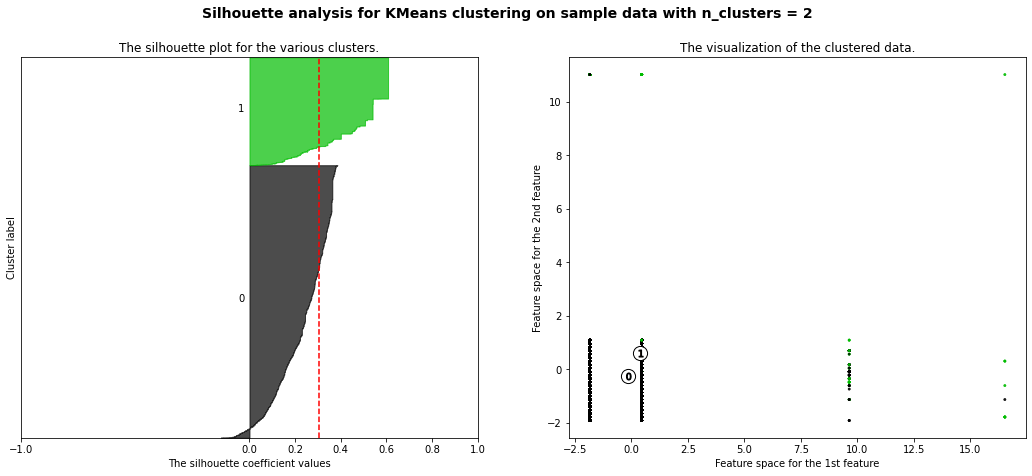

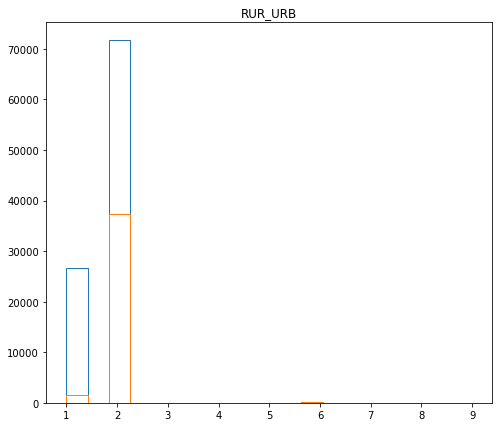

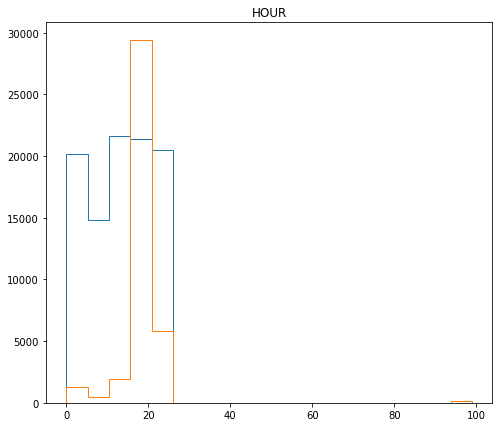

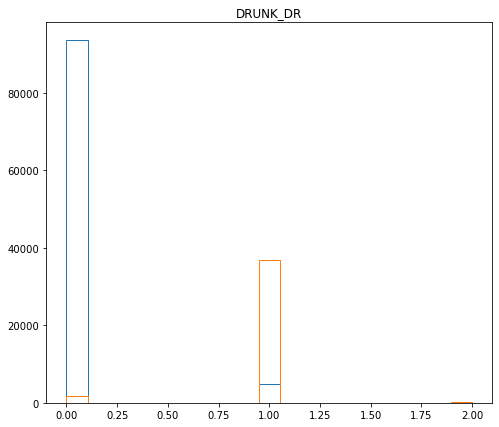

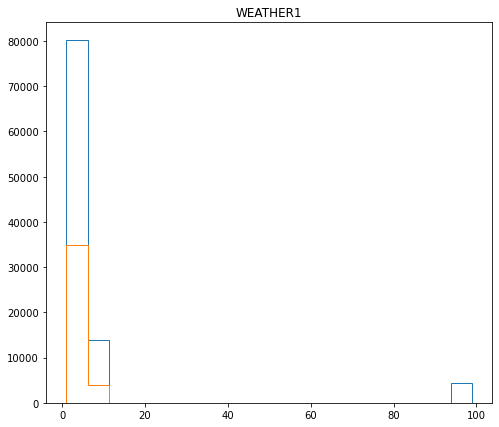

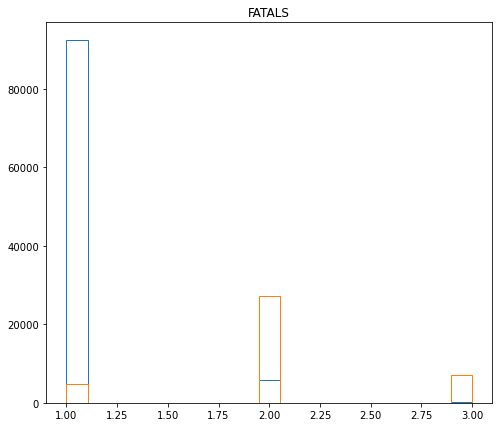

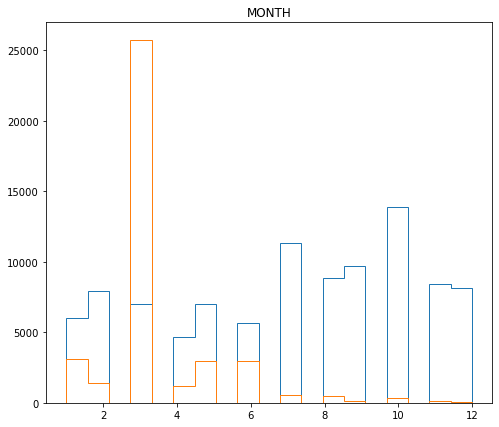

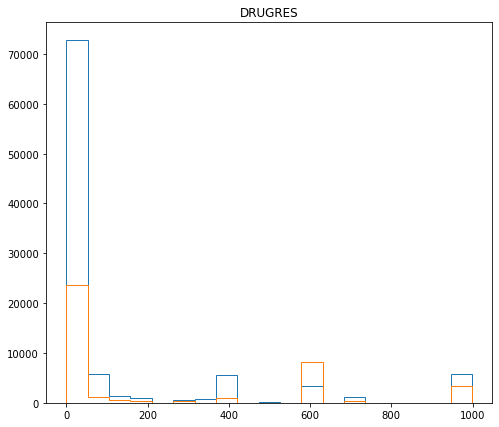

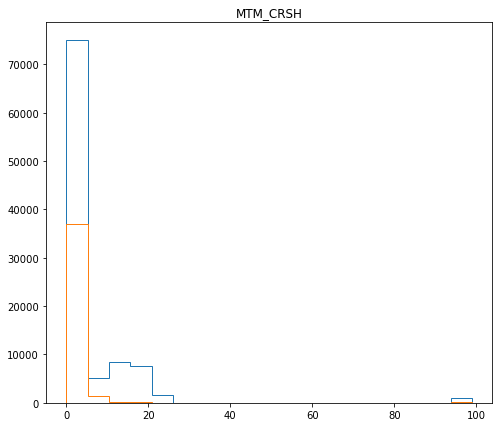

in loop 1
KMeans(n_clusters=3, random_state=0)
For n_clusters = 3 The average silhouette_score is : 0.3420316567518312
in loop 2
in loop 2
in loop 2


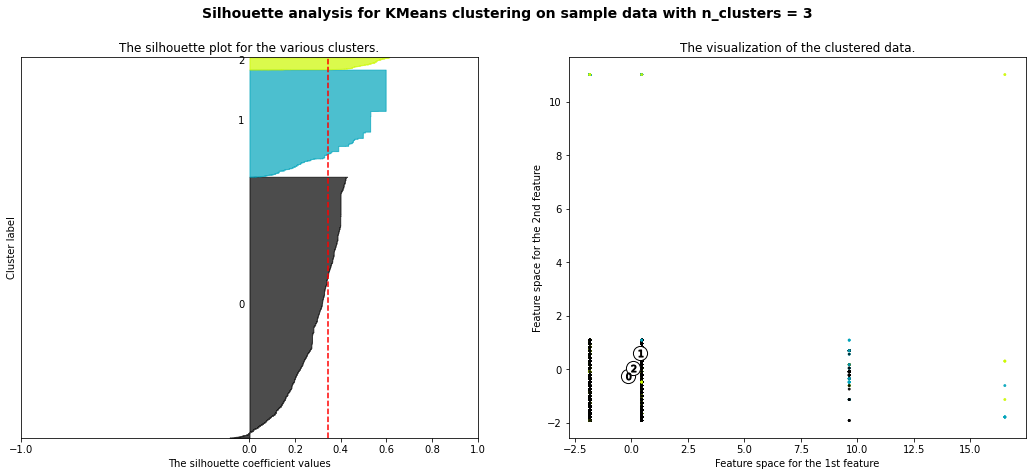

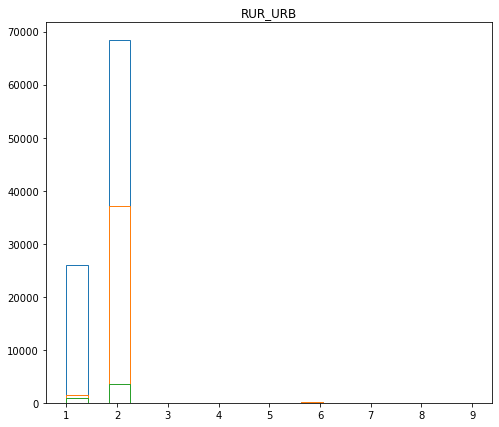

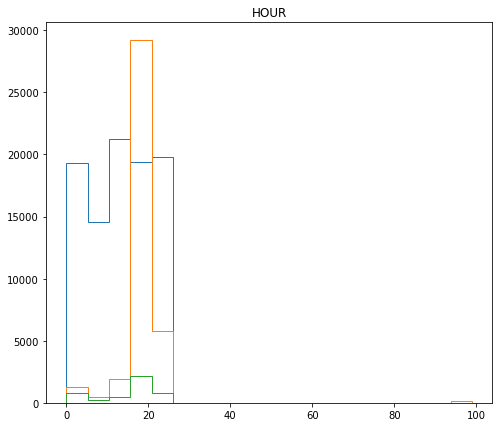

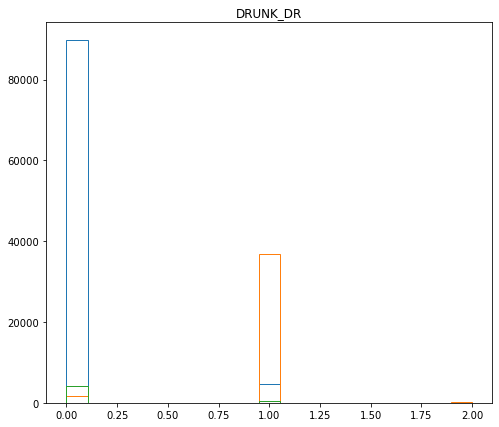

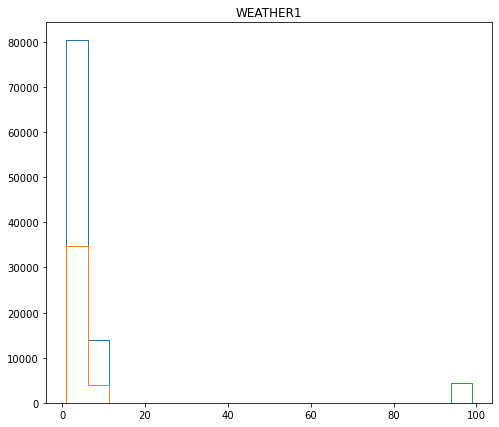

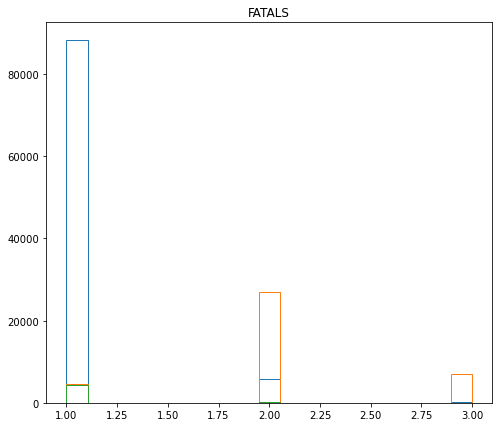

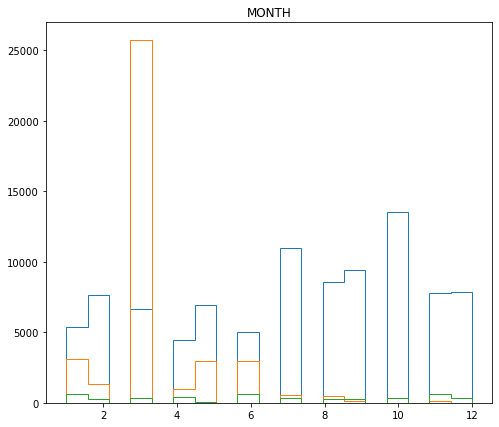

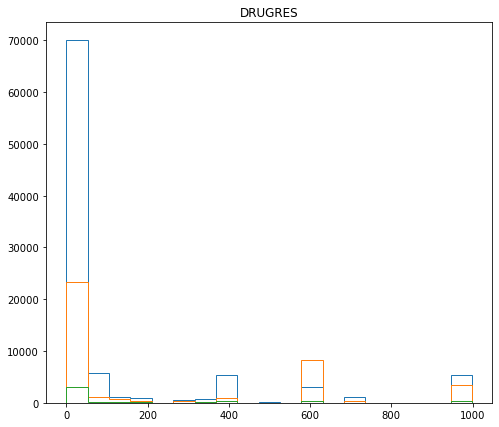

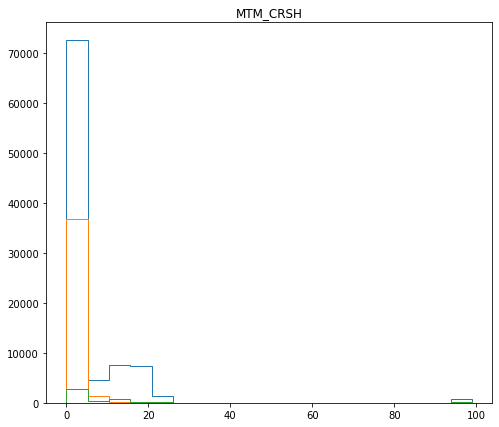

in loop 1
KMeans(n_clusters=4, random_state=0)
For n_clusters = 4 The average silhouette_score is : 0.3295777954836884
in loop 2
in loop 2
in loop 2
in loop 2


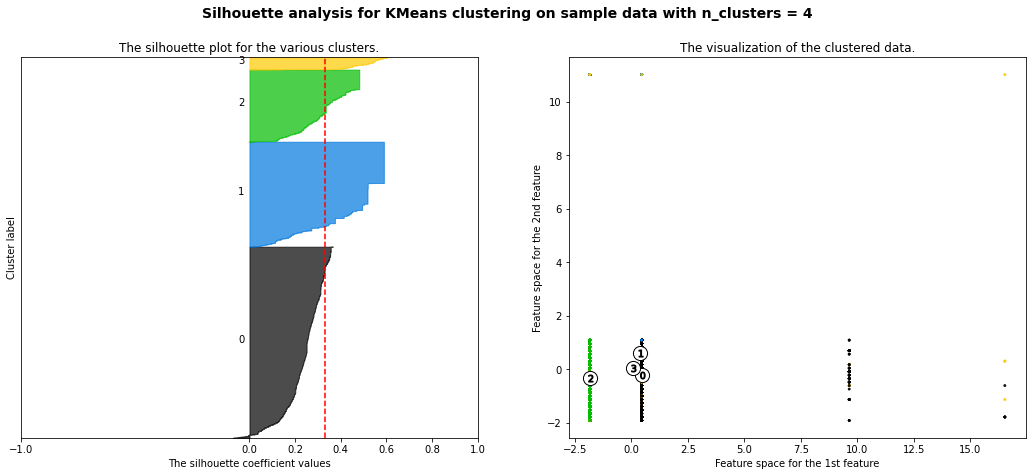

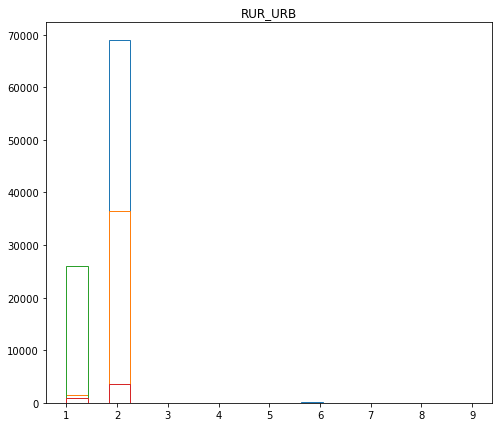

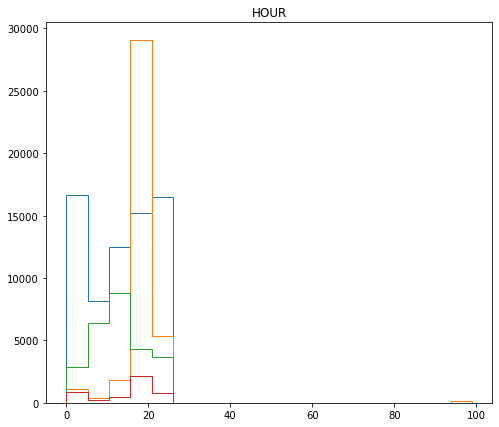

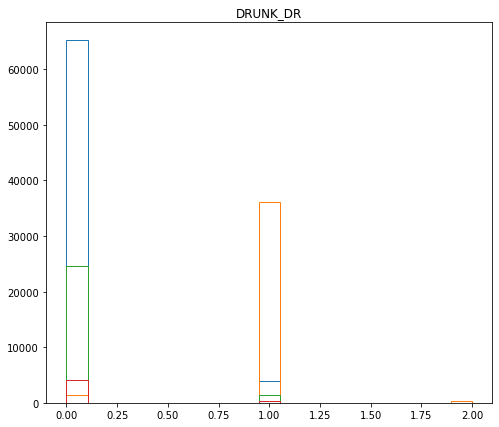

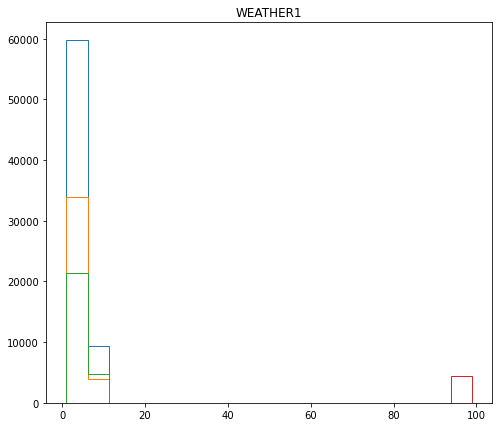

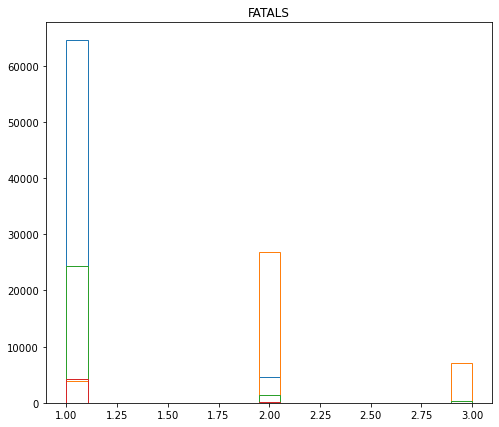

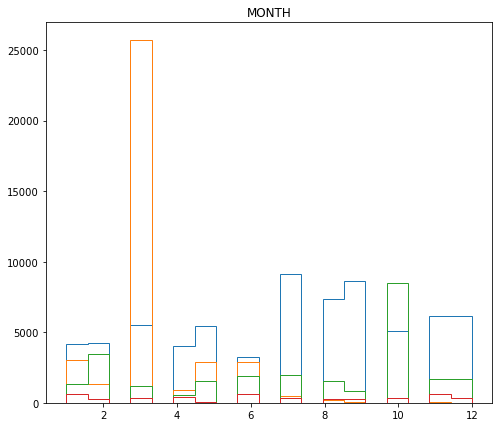

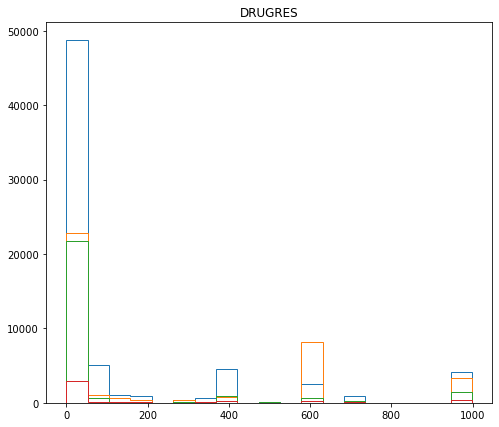

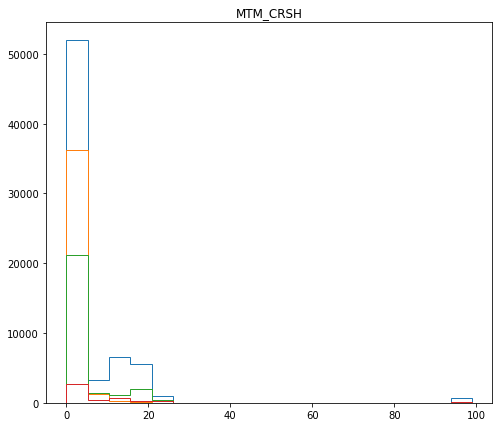

in loop 1
KMeans(n_clusters=5, random_state=0)
For n_clusters = 5 The average silhouette_score is : 0.33850543267552374
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2


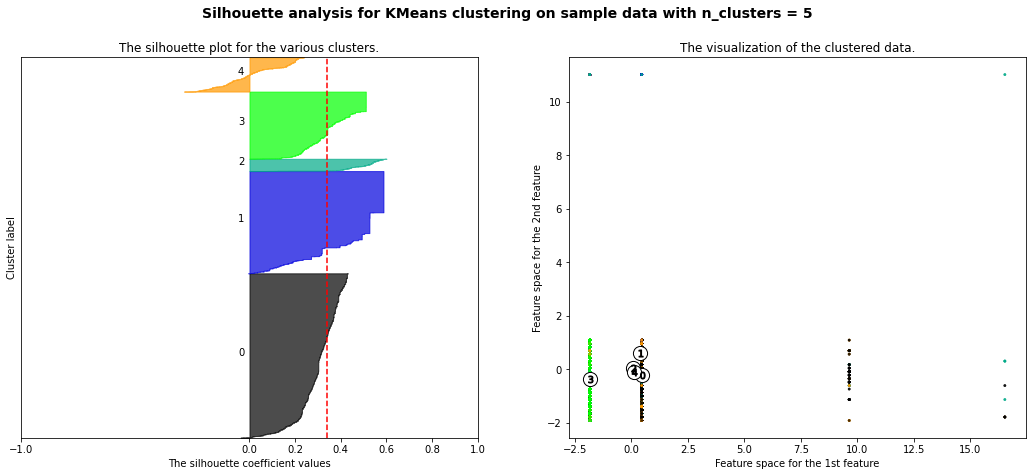

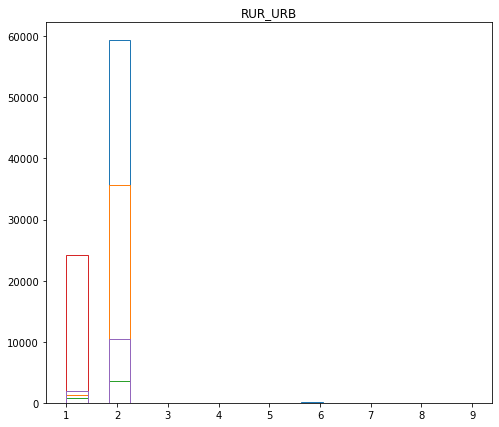

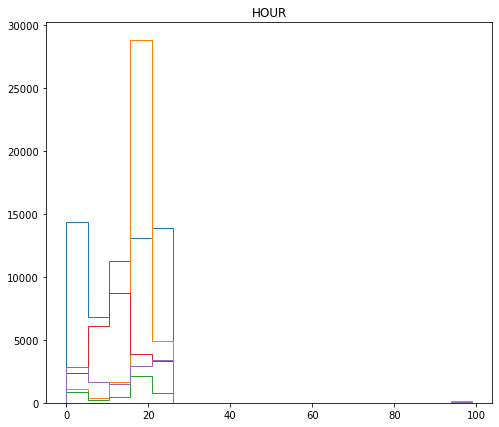

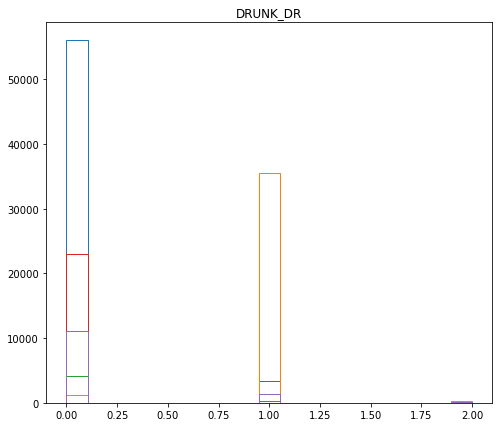

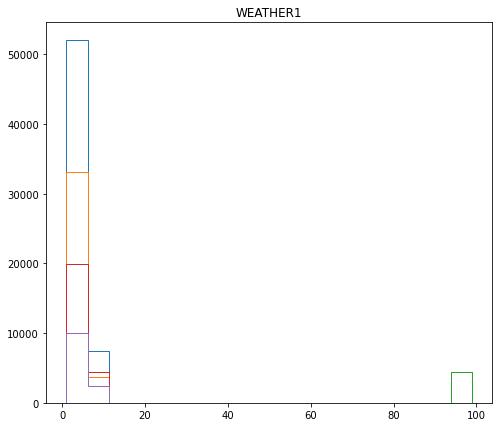

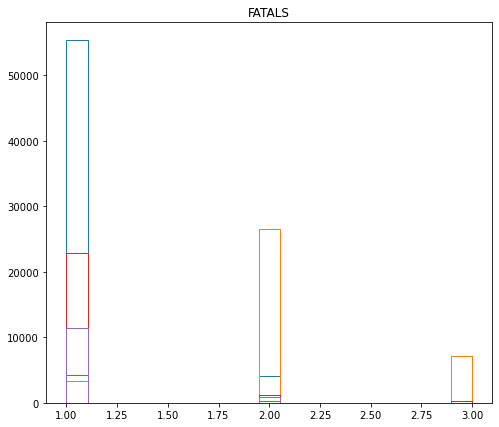

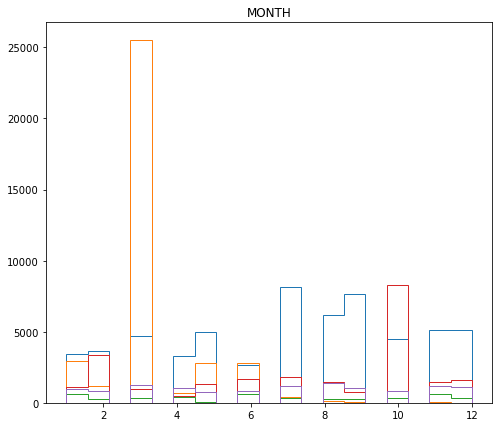

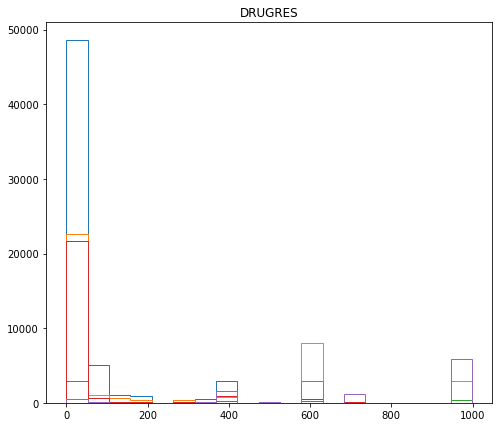

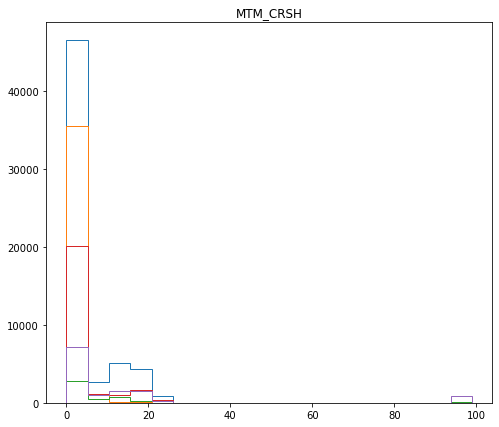

in loop 1
KMeans(n_clusters=6, random_state=0)
For n_clusters = 6 The average silhouette_score is : 0.32300633409140767
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2


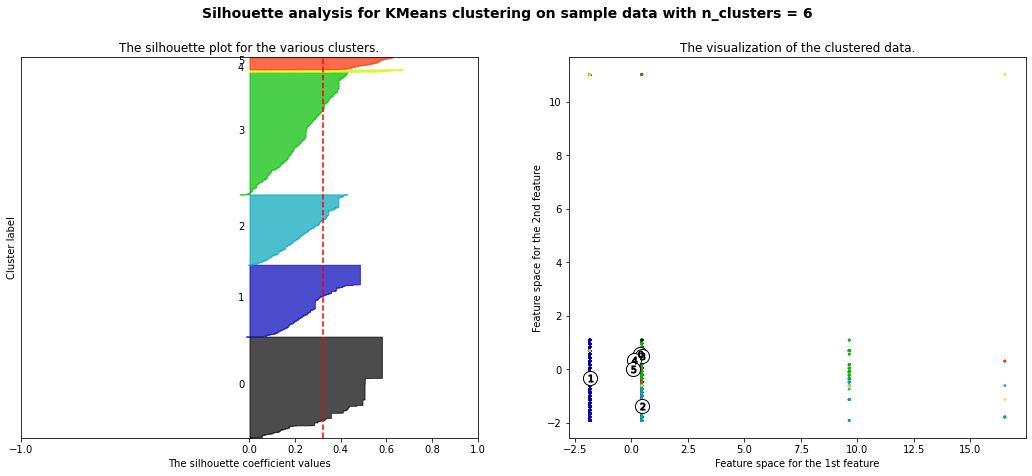

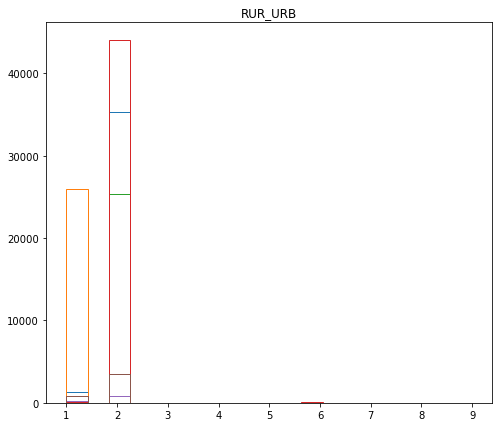

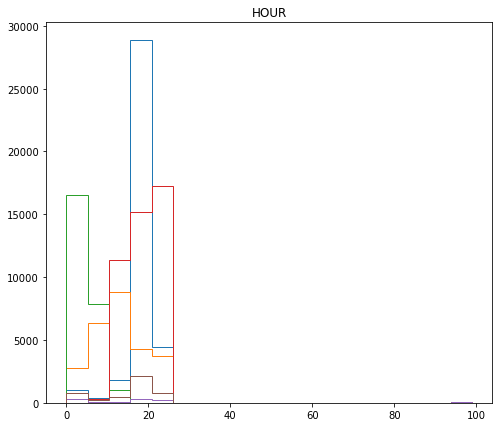

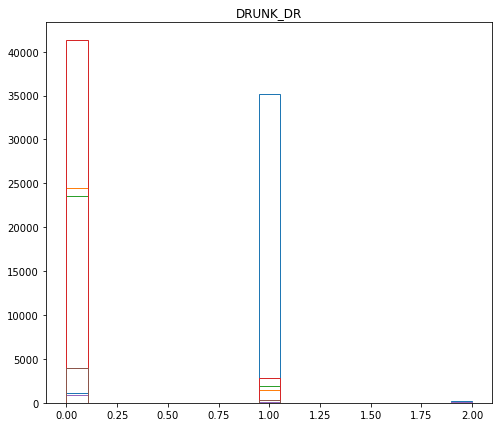

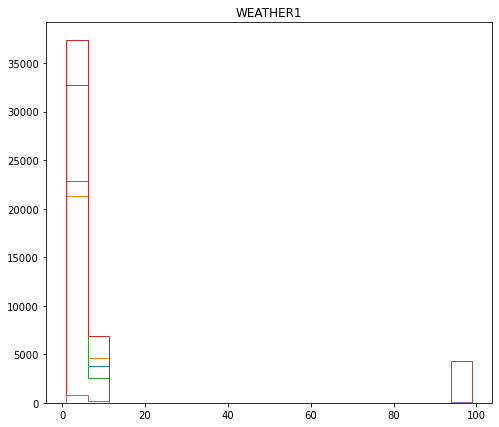

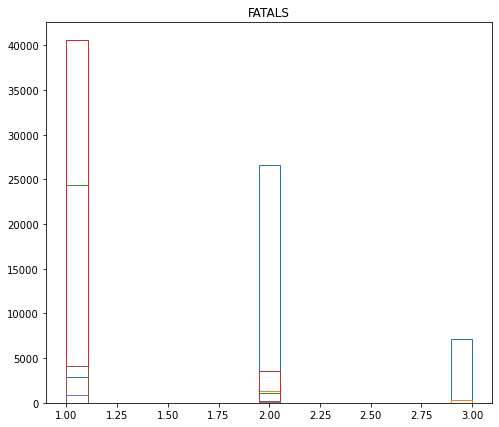

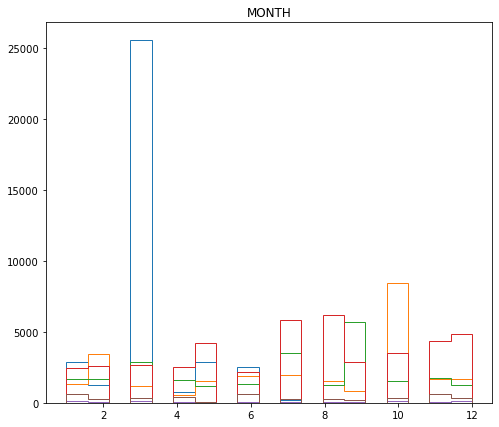

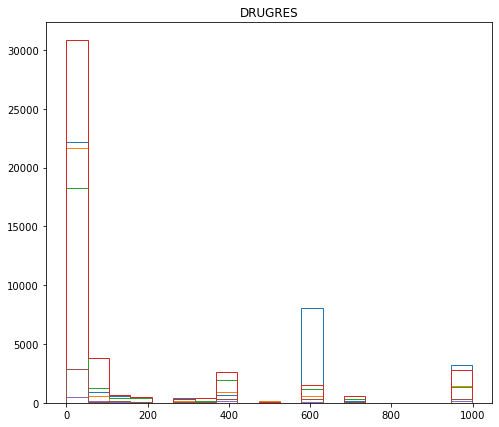

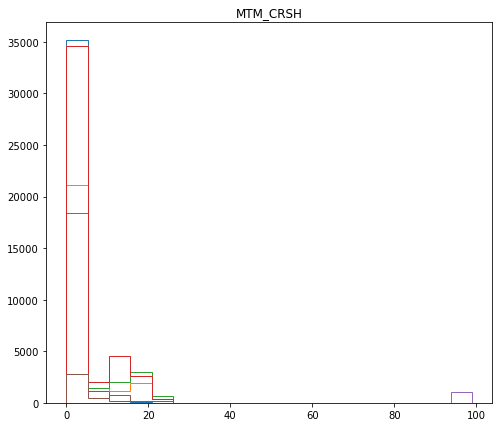

in loop 1
KMeans(n_clusters=7, random_state=0)
For n_clusters = 7 The average silhouette_score is : 0.33572395866832994
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2


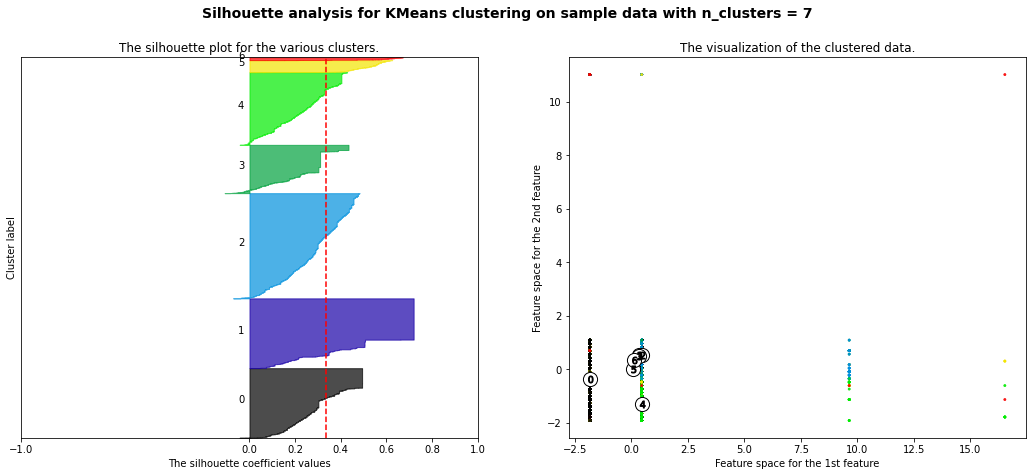

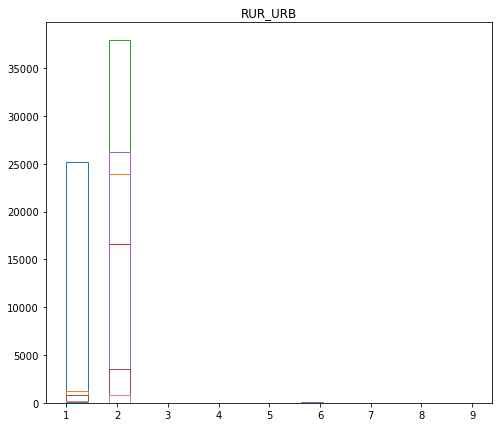

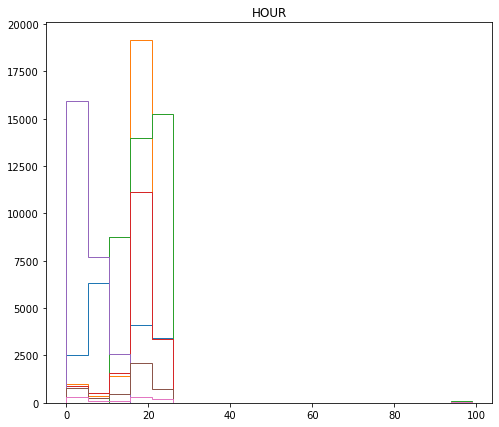

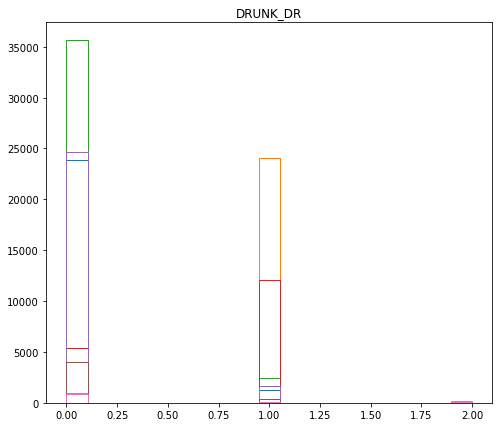

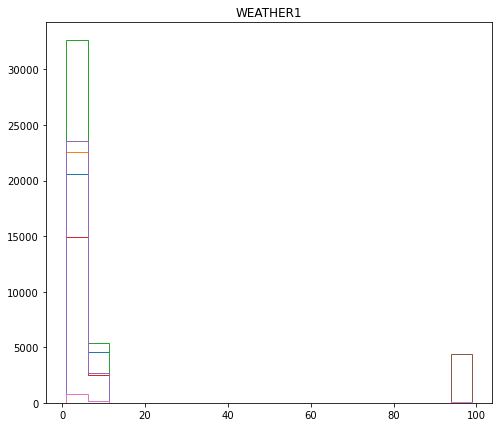

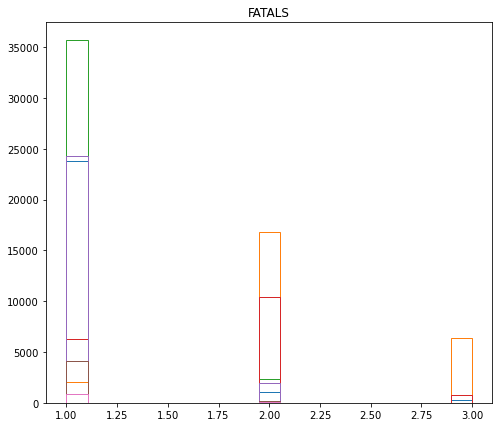

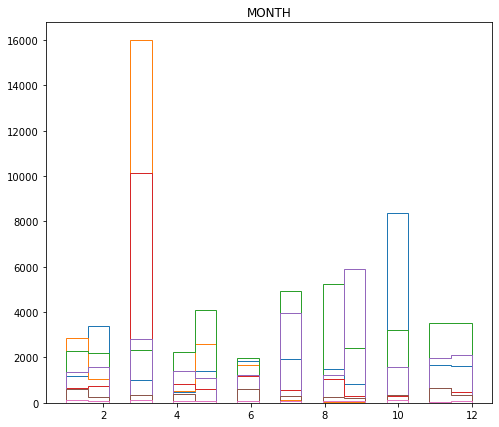

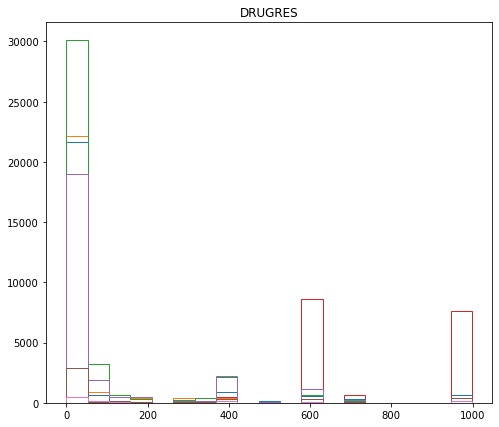

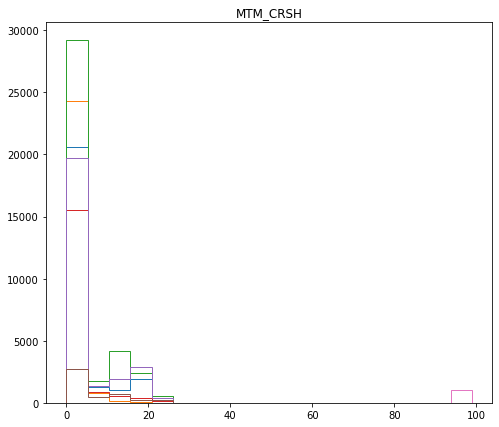

in loop 1
KMeans(random_state=0)
For n_clusters = 8 The average silhouette_score is : 0.3556048430034548
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2
in loop 2


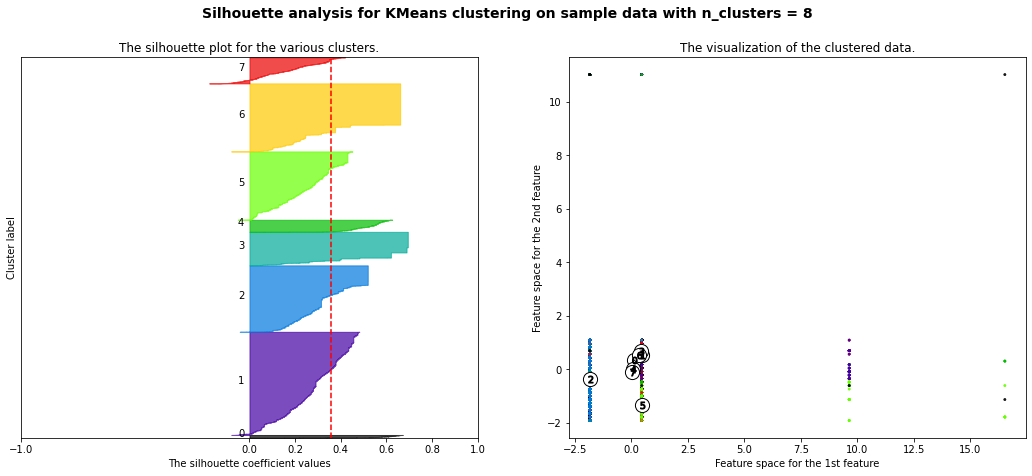

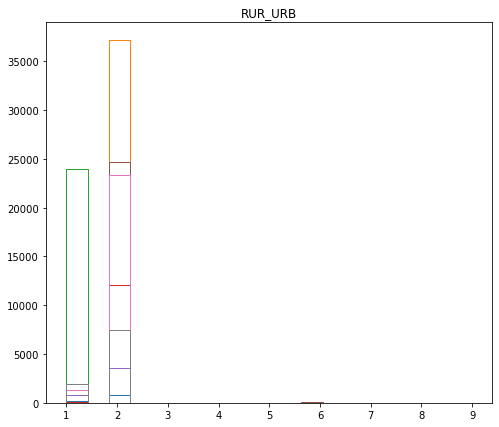

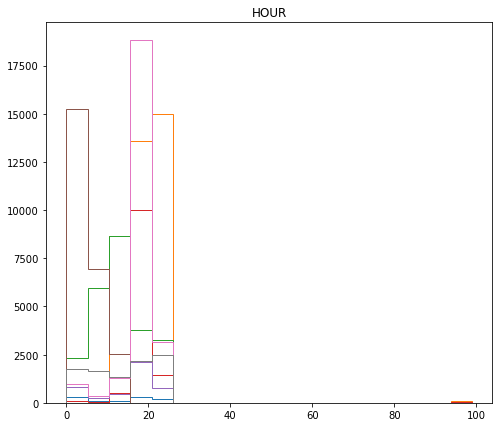

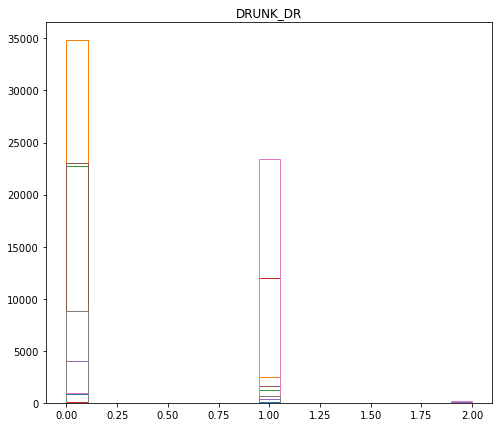

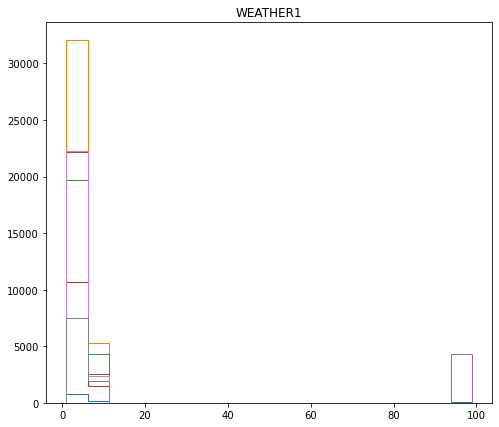

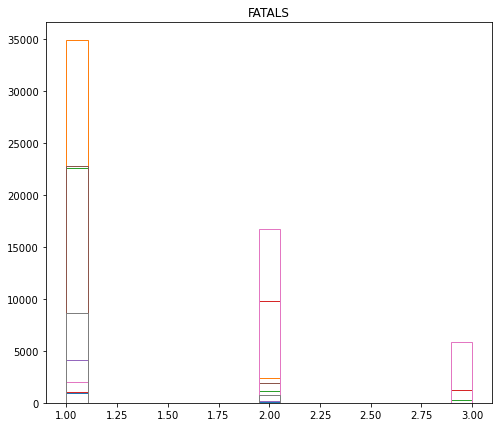

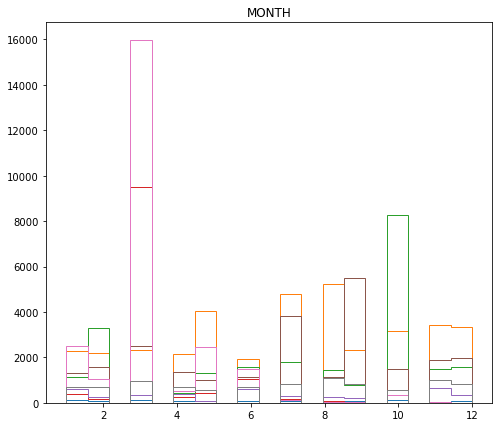

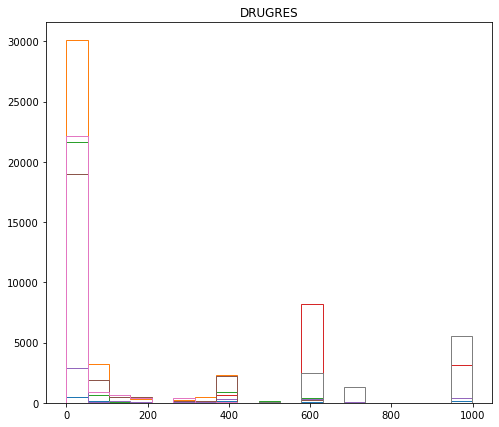

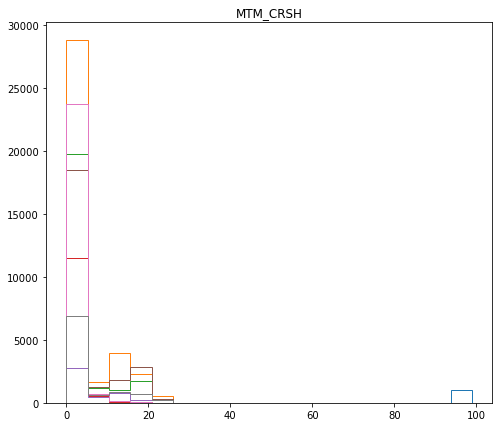

in loop 1
KMeans(n_clusters=9, random_state=0)
For n_clusters = 9 The average silhouette_score is : 0.34469504989885397


KeyboardInterrupt: 

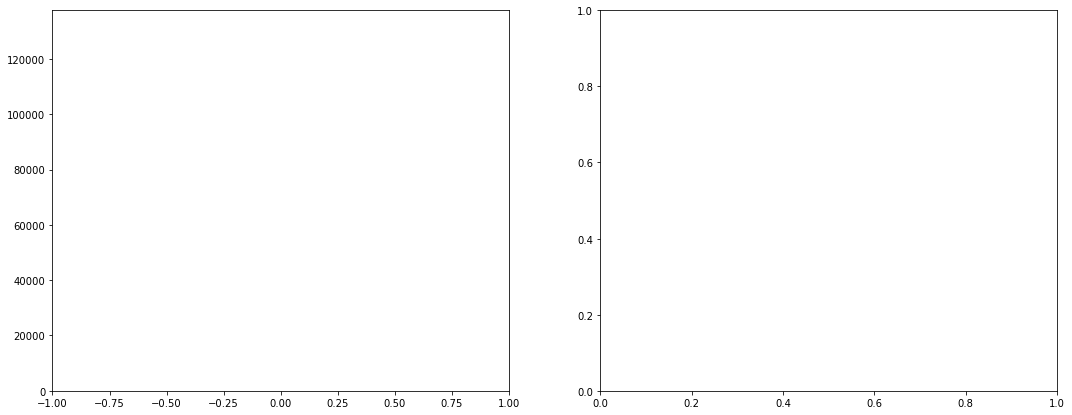

In [98]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
#features = ['MINUTE', 'HOSP_MN'] #'HOSP_MN', 'VE_TOTAL'
features = ['RUR_URB','HOUR','DRUNK_DR', 'WEATHER1','FATALS', 'MONTH', 'DRUGRES','MTM_CRSH']
#features = mn

# look_for
x = merge.loc[:, features].values
y = merge.loc[:, ['DRUNK_DR']].values
X = StandardScaler().fit_transform(x)
for n_clusters in range_n_clusters:
    print('in loop 1')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    print(clusterer)
    #clusterer.fit(X)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        print('in loop 2')
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k")
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()
    for feature_idx, feature_name in enumerate(features):
        bins = np.linspace(np.min(x[:,feature_idx]),np.max(x[:,feature_idx]),20)
        for group_id in range(n_clusters):
            cluster_label_match_idxs = np.where(cluster_labels == group_id)[0]
            plt.hist(x[cluster_label_match_idxs,feature_idx],histtype='step', label = str(group_id), bins = bins)
            plt.title(feature_name)
        
        plt.show()

First things to notice, almost all accidents happen in cities, especially large ones.  Rural accidents on bikes are rare. 

|--- VE_TOTAL <= 1.50
|   |--- HOSP_MN <= 13.50
|   |   |--- class: 0.0
|   |--- HOSP_MN >  13.50
|   |   |--- HOSP_MN <= 20.50
|   |   |   |--- class: 0.0
|   |   |--- HOSP_MN >  20.50
|   |   |   |--- class: 0.0
|--- VE_TOTAL >  1.50
|   |--- FATALS <= 1.50
|   |   |--- PERSONS <= 1.50
|   |   |   |--- class: 0.0
|   |   |--- PERSONS >  1.50
|   |   |   |--- class: 0.0
|   |--- FATALS >  1.50
|   |   |--- PERSONS <= 4.00
|   |   |   |--- class: 0.0
|   |   |--- PERSONS >  4.00
|   |   |   |--- class: 2.0

Accuracy is 0.9405840886203424
0.8851963746223565
0.8851963746223565


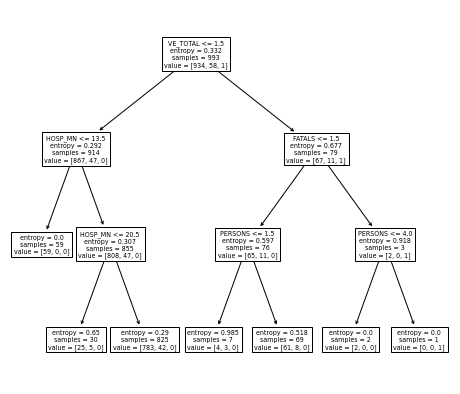

In [92]:
features_1 = ['PERSONS','FATALS','VE_TOTAL','HOSP_MN']
X = newdf[features_1].to_numpy()
y = newdf['DRUNK_DR'].to_numpy()
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size = .5, random_state = 10, stratify = y)
clf = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 3)
clf.fit(X_train,y_train)
plt.rcParams['figure.figsize'] = (8,7)
tree.plot_tree(clf, feature_names = features_1)
print(export_text(clf,  feature_names = features_1))
print(f'Accuracy is {clf.score(X_temp,y_temp)}')
print(recall_score(y_true = y_train, y_pred = y_temp, average='micro'))
print(precision_score(y_true = y_train, y_pred = y_temp, average='micro'))
# vast majority is non drunk, have to use train test split otherwise it is skewed

In [25]:
from sklearn.preprocessing import StandardScaler
features = ['PERSONS', 'FATALS','VE_TOTAL'] #'HOSP_MN',
x = newdf.loc[:, features].values
y = newdf.loc[:, ['DRUNK_DR']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
principalDataframe
targetDataframe = df[['DRUNK_DR']]
newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1)
pca.explained_variance_ratio_

array([0.50504838, 0.32360972, 0.1713419 ])

Less explainability in these variables for bikes compared to cars

In [26]:
pca.components_

array([[ 0.67436587,  0.25354992,  0.69350062],
       [-0.2592241 ,  0.96071201, -0.09917306],
       [-0.6913997 , -0.11289315,  0.71359764]])

kmeans.labels_=[0 4 0 ... 0 0 0]
<class 'list'>


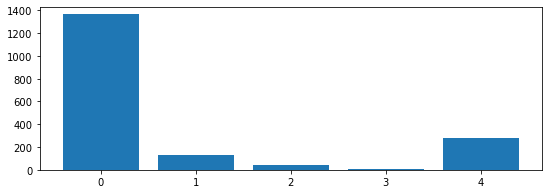

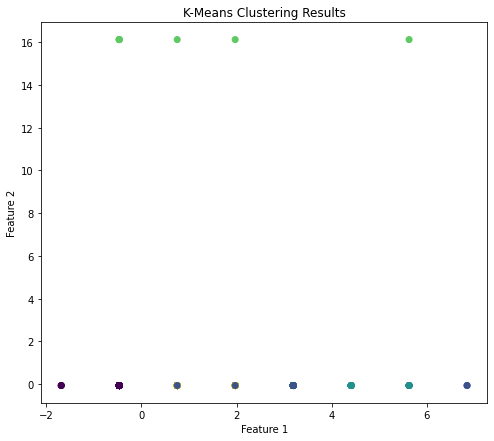

In [27]:
x = newdf.loc[:, features].values
y = newdf.loc[:, ['DRUNK_DR']].values
X = StandardScaler().fit_transform(x)
# Where did I get the n_clusters=10? Cheating! I know these are
# images of 10 digits, but normal clustering is on unlabeled data.
kmeans = KMeans(n_clusters=5, n_init=5, random_state=0)
N = X.shape[0]
kmeans.fit(X)
print(f'kmeans.labels_={kmeans.labels_}') # cluster IDs, not digit labels
#print(f'kmeans.cluster_centers_={kmeans.cluster_centers_}')
r = kmeans.labels_
r = list(r)
print(type(r))
def count_unique_values(lst):
    value_counts = {}
    for value in lst:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    return value_counts
x = count_unique_values(r)
keys = list(x.keys())
values = list(x.values())

# Set the figure size
plt.figure(figsize=(9, 3))

# Plot the bar chart
plt.bar(keys, values)

# Show the plot
plt.show()

clusters = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')

# Add a title and labels to the plot
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

In [28]:
newdf.head(1)

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
30,1.0,Alabama,10031.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,99.0,Unknown EMS Hospital Arrival Time,0.0,None,0.0,None,0.0,None,1.0,0.0


In [29]:
def loop_by_column(df, column_name):
    dict_of_dfs = {}
    unique_values = df[column_name].unique()
    for value in unique_values:
        filtered_df = df[df[column_name] == value]
        dict_of_dfs[value] = filtered_df.reset_index(inplace=False)
    return dict_of_dfs

x = loop_by_column(newdf, 'STATENAME')

In [30]:
y = x['Wisconsin']
z = y[['STATENAME','VE_TOTAL','VE_FORMS','PEDS','PERSONS','PERMVIT','HOSP_MN','HOSP_MNNAME','CF1NAME','FATALS','DRUNK_DR','WEATHERNAME','HOURNAME','RUR_URBNAME','RUR_URB','ROUTENAME','LATITUDE', 'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME']]

In [31]:
z.head()

,STATENAME,VE_TOTAL,VE_FORMS,PEDS,PERSONS,PERMVIT,HOSP_MN,HOSP_MNNAME,CF1NAME,FATALS,DRUNK_DR,WEATHERNAME,HOURNAME,RUR_URBNAME,RUR_URB,ROUTENAME,LATITUDE,LATITUDENAME,LONGITUD,LONGITUDNAME
0,Wisconsin,1.0,1.0,1.0,1.0,1.0,88.0,Not Applicable (Not Transported),None,1.0,0.0,Sleet or Hail,11:00pm-11:59pm,Rural,1.0,U.S. Highway,45.409583,45.40958333,-92.079203,-92.07920278
1,Wisconsin,1.0,1.0,1.0,1.0,1.0,88.0,Not Applicable (Not Transported),None,1.0,0.0,Clear,3:00am-3:59am,Rural,1.0,County Road,44.077767,44.07776667,-89.106969,-89.10696944
2,Wisconsin,1.0,1.0,1.0,2.0,2.0,88.0,Not Applicable (Not Transported),None,1.0,0.0,Clear,8:00pm-8:59pm,Rural,1.0,State Highway,44.964778,44.96477778,-90.078839,-90.07883889
3,Wisconsin,1.0,1.0,1.0,1.0,1.0,99.0,Unknown EMS Hospital Arrival Time,Other Maintenance or Construction-Created Cond...,1.0,0.0,Cloudy,11:00am-11:59am,Rural,1.0,State Highway,44.933258,44.93325833,-88.750425,-88.750425
4,Wisconsin,1.0,1.0,1.0,1.0,1.0,11.0,11,None,1.0,0.0,Clear,4:00pm-4:59pm,Urban,2.0,Local Street - Municipality,43.110106,43.11010556,-88.496364,-88.49636389


In [32]:
dict_of_counts = {}
for i in range(len(x)):
    val = list(x.keys())[i]
    y = x[val]
    count = count_unique_values(y['RUR_URBNAME'])
    dict_of_counts[i] = count

In [33]:
dict_of_counts1 = {}
for i in range(len(x)):
    val = list(x.keys())[i]
    y = x[val]
    count = count_unique_values(y['WEATHERNAME'])
    dict_of_counts1[i] = count

In [34]:
dict_of_counts2 = {}
for i in range(len(x)):
    val = list(x.keys())[i]
    y = x[val]
    count = count_unique_values(y['HOURNAME'])
    dict_of_counts2[i] = count
dict_of_counts2

{0: {'4:00pm-4:59pm': 1,
  '6:00pm-6:59pm': 2,
  '10:00am-10:59am': 2,
  '10:00pm-10:59pm': 2,
  '6:00am-6:59am': 1,
  '3:00pm-3:59pm': 1,
  '2:00am-2:59am': 1,
  '2:00pm-2:59pm': 1,
  '5:00am-5:59am': 2,
  '9:00pm-9:59pm': 1,
  '3:00am-3:59am': 1,
  '5:00pm-5:59pm': 2},
 1: {'1:00pm-1:59pm': 1,
  '1:00am-1:59am': 1,
  '11:00pm-11:59pm': 1,
  '9:00am-9:59am': 1,
  '5:00pm-5:59pm': 1},
 2: {'7:00pm-7:59pm': 3,
  '6:00pm-6:59pm': 6,
  '4:00pm-4:59pm': 1,
  '5:00am-5:59am': 4,
  '8:00pm-8:59pm': 8,
  '10:00pm-10:59pm': 5,
  '1:00am-1:59am': 2,
  '10:00am-10:59am': 1,
  '6:00am-6:59am': 6,
  '1:00pm-1:59pm': 4,
  '9:00am-9:59am': 2,
  '8:00am-8:59am': 2,
  '4:00am-4:59am': 1,
  '7:00am-7:59am': 2,
  '3:00am-3:59am': 2,
  '9:00pm-9:59pm': 1,
  '0:00am-0:59am': 1,
  '5:00pm-5:59pm': 1,
  '11:00pm-11:59pm': 1},
 3: {'5:00pm-5:59pm': 3,
  '7:00pm-7:59pm': 1,
  '9:00am-9:59am': 1,
  '1:00pm-1:59pm': 1,
  '1:00am-1:59am': 1,
  '6:00am-6:59am': 2,
  '8:00pm-8:59pm': 1},
 4: {'2:00am-2:59am': 6,
 

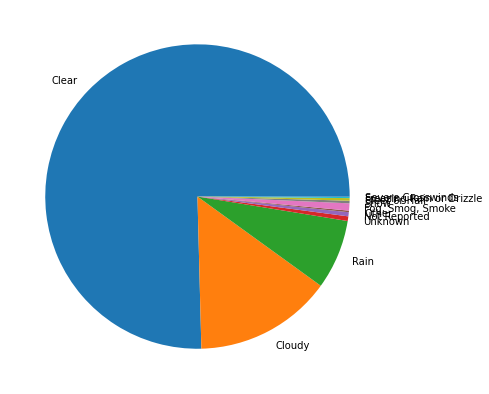

In [35]:
dict_of_dicts = dict_of_counts1
counts = {}
for key, value in dict_of_dicts.items():
    for kind, count in value.items():
        if kind in counts:
            counts[kind] += count
        else:
            counts[kind] = count
labels = list(counts.keys())
values = list(counts.values())

plt.pie(values, labels=labels)
plt.show()

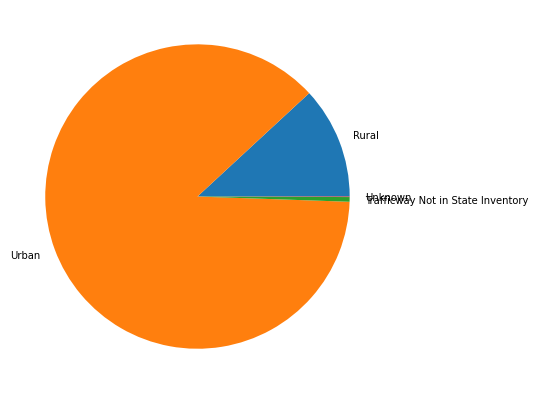

In [36]:
dict_of_dicts = dict_of_counts
counts = {}
for key, value in dict_of_dicts.items():
    for kind, count in value.items():
        if kind in counts:
            counts[kind] += count
        else:
            counts[kind] = count
labels = list(counts.keys())
values = list(counts.values())

plt.pie(values, labels=labels)
plt.show()


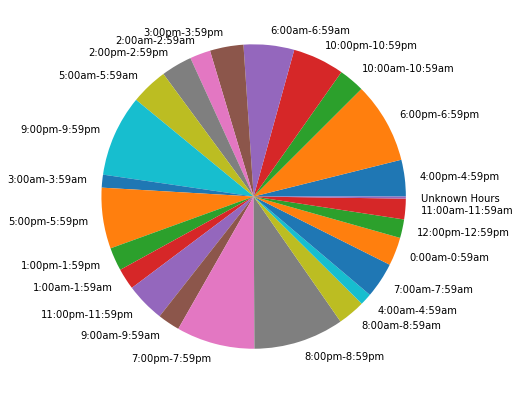

In [37]:
dict_of_dicts = dict_of_counts2
counts = {}
for key, value in dict_of_dicts.items():
    for kind, count in value.items():
        if kind in counts:
            counts[kind] += count
        else:
            counts[kind] = count
labels = list(counts.keys())
values = list(counts.values())

plt.pie(values, labels=labels)
plt.show()

In [39]:
count = count_unique_values(z['RUR_URBNAME'])

In [40]:
def for_the_whole_system(input_df, column_looking_comp):
    zp = loop_by_column(input_df,column_looking_comp)
    for key, value in zp.items():
        # Calculate the average of the values
        avg = sum(value) / len(value)
        # Add the key and average value to the lists
        keys.append(key)
        values.append(avg)
      # Plot the results
    plt.bar(keys, values)
    plt.title('Averages')
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.show()


In [41]:
# for_the_whole_system(newdf, 'STATENAME')

In [42]:
# def plot_grouped_data(df, group_column):
#     # Group the data by the specified column and count the values
#     counts = df.groupby(group_column).count()

#     values = count_unique_values(z['RUR_URBNAME'])
#     index = counts.index
#       # Create the bar chart
#     plt.bar(index, values)
#     plt.title('Value Counts by Group')
#     plt.xlabel(group_column)
#     plt.ylabel('Value Count')
#     plt.show()
# plot_grouped_data(df, 'STATENAME')

In [43]:
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u


loc = coord.EarthLocation(lon=0.1 * u.deg,
                          lat=51.5 * u.deg)
now = Time.now()

altaz = coord.AltAz(location=loc, obstime=now)
sun = coord.get_sun(now)

print(sun.transform_to(altaz).alt)

-16d22m38.54340191s


Say, for calcuating the the degree of the sun: what are we looking for> Maybe total light? Maybe angles relative to road direction and car stuff? most happen in the evening, is that indicative of light available or is it rather a symptom of mental fatigue.  

In [83]:
from datetime import datetime
from astral import LocationInfo
from astral.sun import sun

In [78]:
def zenith_angle(lat,lon,time):
    city = LocationINfor(("",""),lat,lon)
    s = sun(city.observer, date = time)
    return 90-s['zenith']

In [101]:
df['datetime'] = pd.to_datetime(df[['DAY','MONTH','HOUR','MINUTE','YEAR']])

<AxesSubplot:xlabel='datetime'>

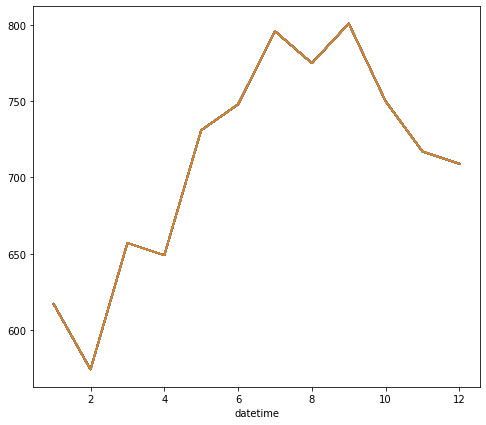

In [110]:
df.groupby(df["datetime"].dt.month).count().plot(kind="line", legend = False)

In [58]:
df = df.reset_index()

In [59]:
#zenith_angle(31.31933056,-85.5151,df['datetime'][4])

In [60]:
import ephem

In [87]:
def zenith_angle(lat,lon,time):
    observer = ephem.Observer()
    observer.lat = lat
    observer.lon = lon
    observer.date = time
   # sun = ephem.Sun(observer)
    sun = ephem.Sun()
    sun.compute(observer)
    return (observer.elevation - sun.alt)

In [71]:
df['Zenith'] = df.apply(lambda row: zenith_angle(row['LATITUDE'],row['LONGITUD'],row['datetime']), axis =1)

In [86]:
df['datetime'][100]

Timestamp('2019-03-02 04:45:00')

In [99]:
obs = ephem.Observer()
obs.lat = df['LATITUDE'][122]
obs.lon = df['LONGITUD'][122]

obs.date = df['datetime'][122]
sun = ephem.Sun()
sun.compute(obs)
print("Sunset: ", obs.next_setting(sun))
print("alt",sun.alt)
print("Testing", )

Sunset:  2019/4/7 13:19:48
alt -0:15:58.7


In [73]:
sum(df['Zenith'] > 1)

0

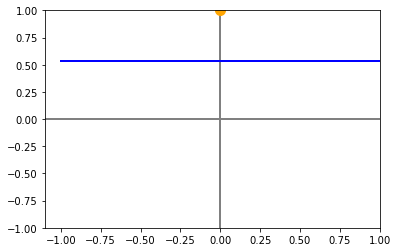

In [65]:
zenith = 0.619579553604126
horizon = 90-zenith*100
fig, ax = plt.subplots()

ax.set_ylim(-1,1)
ax.set_xlim(-1.1)
ax.axhline(0,color = 'gray',lw = 2)
ax.axvline(0,color = 'gray', lw = 2)

plt.plot(0,np.cos(np.deg2rad(zenith)),'o',color = 'orange',markersize = 10)

plt.plot([-1,1],[np.tan(np.deg2rad(horizon)),np.tan(np.deg2rad(horizon))],'-',color = 'blue',lw=2)
plt.show()

In [67]:
df[['Zenith','WEATHERNAME','HOUR']]

,Zenith,WEATHERNAME,HOUR
0,0.566780,Clear,12
1,-0.627903,Rain,18
2,0.034593,Cloudy,19
3,1.047423,Clear,3
4,-0.292490,"Fog, Smog, Smoke",5
...,...,...,...
33482,0.893928,Severe Crosswinds,18
33483,0.291439,Clear,13
33484,-0.497657,Clear,15
33485,0.886127,Clear,4
